*Assignment* 02: DL - LP5

A. Classification using Deep neural network (Any One from the following)
Binary classification using Deep Neural Networks Example: Classify movie reviews into
positive" reviews and "negative" reviews, just based on the text content of the reviews.
Use IMDB dataset

B.Multiclass classification using Deep Neural Networks: Example: Use the OCR letter
recognition datasethttps://archive.ics.uci.edu/ml/datasets/letter+recognition

**2nd** **A**

Multiclass classification using Deep Neural Networks: Example: Use the OCR letter recognition dataset https://archive.ics.uci.edu/ml/datasets/letter+recognition

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [12]:

dataset = pd.read_csv("./letter-recognition.data", sep = ",")
dataset.head(10)


,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
5,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
6,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
7,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
8,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8
9,X,3,9,5,7,4,8,7,3,8,5,6,8,2,8,6,7


In [6]:
X = dataset.iloc[:, 1 : 17]
Y = dataset.select_dtypes(include = [object])
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size = 0.20, random_state = 10)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.979

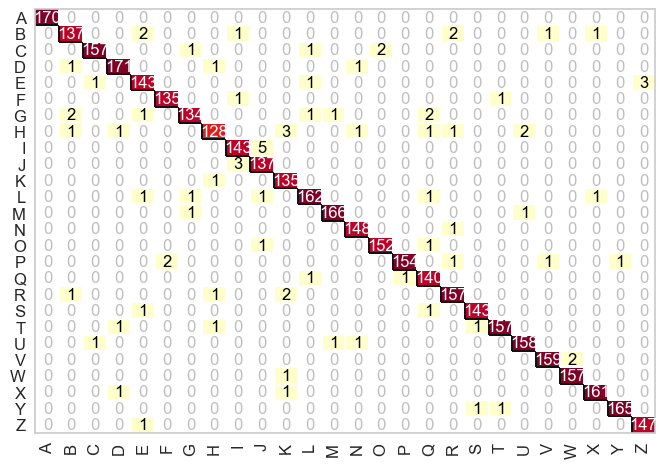

In [7]:
mlp = MLPClassifier(hidden_layer_sizes = (250, 300), max_iter = 1000000, activation = 'logistic')
cm = ConfusionMatrix(mlp, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

cm.fit(X_train, Y_train.values.ravel())
cm.score(X_validation, Y_validation)

In [8]:

predictions = cm.predict(X_validation)

print("Accuracy: ", accuracy_score(Y_validation, predictions))
print("Confusion matrix:",confusion_matrix(Y_validation, predictions))
print("Classification report",classification_report(Y_validation, predictions, digits=5))

Accuracy:  0.979
Confusion matrix: [[170   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 137   0   0   2   0   0   0   1   0   0   0   0   0   0   0   0   2
    0   0   0   1   0   1   0   0]
 [  0   0 157   0   0   0   1   0   0   0   0   1   0   0   2   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   1   0 171   0   0   0   1   0   0   0   0   0   1   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   1   0 143   0   0   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0   0   3]
 [  0   0   0   0   0 135   0   0   1   0   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   0   0]
 [  0   2   0   0   1   0 134   0   0   0   0   1   1   0   0   0   2   0
    0   0   0   0   0   0   0   0]
 [  0   1   0   1   0   0   0 128   0   0   3   0   0   1   0   0   1   1
    0   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 143   5   0   0   0   0   0   0   0   0
    0   0   0   0  

In [9]:
import numpy as np

# Create a custom input data point similar to your dataset
custom_input = np.array([[3	,9	,5	,7	,4	,8	,7,	3	,8	,5	,6	,8	,2	,8	,6,	7]])  # X
# custom_input = np.array([[4	,11,	6	,8	,6	,10,	6,	2,	6,	10,	3,	7,	3,	7,	3,	9,]])  #D
# [3	,9	,5	,7	,4	,8	,7,	3	,8	,5	,6	,8	,2	,8	,6,	7]

# Scale the custom input using the same scaler used for training
custom_input_scaled = scaler.transform(custom_input)

# Predict the class label for the custom input
predicted_class = cm.predict(custom_input_scaled)

# Print the predicted class label
print("Predicted Class:", predicted_class[0])


Predicted Class: X


C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [17]:
import numpy as np

# Create a custom input data point similar to your dataset  
# custom_input = np.array([[88	,1	,3	,1	,1	,8	,6	,6	,6	,6	,5	,9	,1	,7	,5	,10]])  # C
custom_input = np.array([[4	,0,	6	,8	,6	,10,	6,	2,	6,	10,	3,	7,	3,	7,	3,	9,]])  #J

# Scale the custom input using the same scaler used for training
custom_input_scaled = scaler.transform(custom_input)

# Predict the class label for the custom input
predicted_class = cm.predict(custom_input_scaled)

# Print the predicted class label
print("Predicted Class:", predicted_class)


Predicted Class: ['J']


C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [18]:
import numpy as np

# Create a custom input data point similar to your dataset  
# custom_input = np.array([[88	,1	,3	,1	,1	,8	,6	,6	,6	,6	,5	,9	,1	,7	,5	,10]])  # C
custom_input = np.array([[6,10,6,6,4,7,10,5,2,11,5,4,4,11,5,7,]])  #J

# Scale the custom input using the same scaler used for training
custom_input_scaled = scaler.transform(custom_input)

# Predict the class label for the custom input
predicted_class = cm.predict(custom_input_scaled)

# Print the predicted class label
print("Predicted Class:", predicted_class[0])


Predicted Class: P


C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
